<a href="https://colab.research.google.com/github/snehachavhan2004/CODSOFT-Task-2/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reading the data


In [ ]:
df=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin1')

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Preprocessing the data

In [ ]:
df.shape

(15509, 10)

In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


# Drop the column that are not usefull

In [ ]:
df=df.drop(columns=["Name","Actor 2",'Actor 3'])
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(5746, 7)

In [ ]:
# Ensure the column is a string
df['Year'] = df['Year'].astype(str)

# Extract numeric values
df['Year'] = df['Year'].str.extract('(\d+)')

# Convert to numeric, handle non-numeric as NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Replace NaN values with the median of the column
df['Year'].fillna(df['Year'].median(), inplace=True)

# Convert to integer
df['Year'] = df['Year'].astype(int)

# Display the first few rows
print(df['Year'].head())

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64


In [ ]:
# Remove non-numeric characters
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)

# Convert to numeric
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Fill NaN values with a default value, e.g., 0
df['Duration'].fillna(0, inplace=True)

# Convert to integer
df['Duration'] = df['Duration'].astype(int)

print(df['Duration'].head())

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64


In [ ]:
# Step 1: Remove commas and convert to numeric
df['Votes'] = df['Votes'].str.replace(',', '', regex=True)  # Use regex=True to ensure proper replacement
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')  # Convert to numeric, non-numeric values become NaN

# Step 2: Handle NaN values
df['Votes'].fillna(0, inplace=True)  # Replace NaNs with 0, or use another appropriate method

# Step 3: Convert to integer
df['Votes'] = df['Votes'].astype(int)

# Display the first few rows to verify
print(df['Votes'].head())


1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64


In [ ]:
def split_genre_column(MovieData,Genre):

    df['Genre1'] = df[Genre].str.split(',', expand=True)[0]
    df['Genre2'] = df[Genre].str.split(',', expand=True)[1]
    df['Genre3'] = df[Genre].str.split(',', expand=True)[2]
    return df

split_genre_column(df,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [ ]:
df.shape

(5746, 10)

In [ ]:
df.isnull().sum()

,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Genre1,0
Genre2,1717
Genre3,3412


In [ ]:
df=df.fillna(0)
df.isnull().sum()

,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Genre1,0
Genre2,0
Genre3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5746 non-null   int64  
 1   Duration  5746 non-null   int64  
 2   Genre     5746 non-null   object 
 3   Rating    5746 non-null   float64
 4   Votes     5746 non-null   int64  
 5   Director  5746 non-null   object 
 6   Actor 1   5746 non-null   object 
 7   Genre1    5746 non-null   object 
 8   Genre2    5746 non-null   object 
 9   Genre3    5746 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 493.8+ KB


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(5746, 10)

# Exploratory Data Analysis (EDA)
i. Number of Movies each Year

Year
1931      2
1932      1
1933      1
1934      2
1935      5
       ... 
2017    215
2018    208
2019    233
2020    146
2021     68
Length: 91, dtype: int64


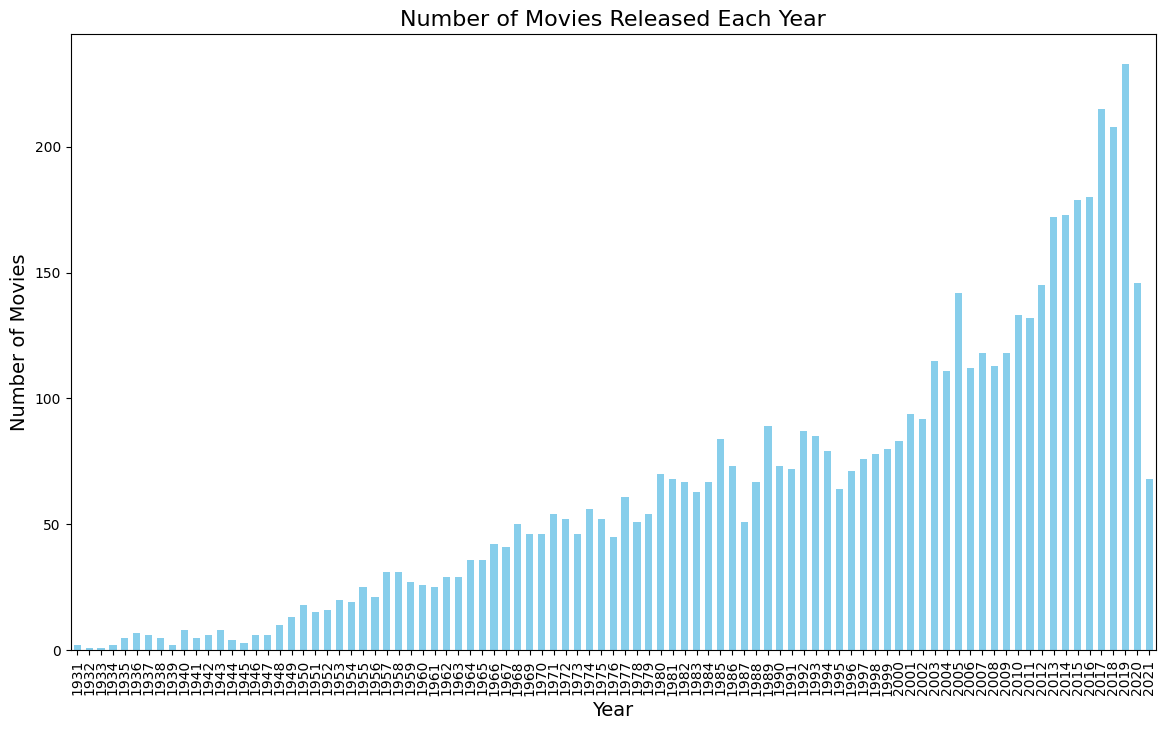

In [ ]:
movies_per_year = df.groupby('Year').size()
print(movies_per_year)

# Plotting the number of movies per year
plt.figure(figsize=(14, 8))
movies_per_year.plot(kind='bar', color='skyblue',width=0.6)

# Adding title and labels
plt.title('Number of Movies Released Each Year',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Movies',fontsize=14)

# Show the plot
plt.show()

ii. Top 20 Directors with the Most Movies

<ipython-input-40-53f9a1ff7c6f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Director', data=df, order=df['Director'].value_counts().index[:20], palette='Set3')


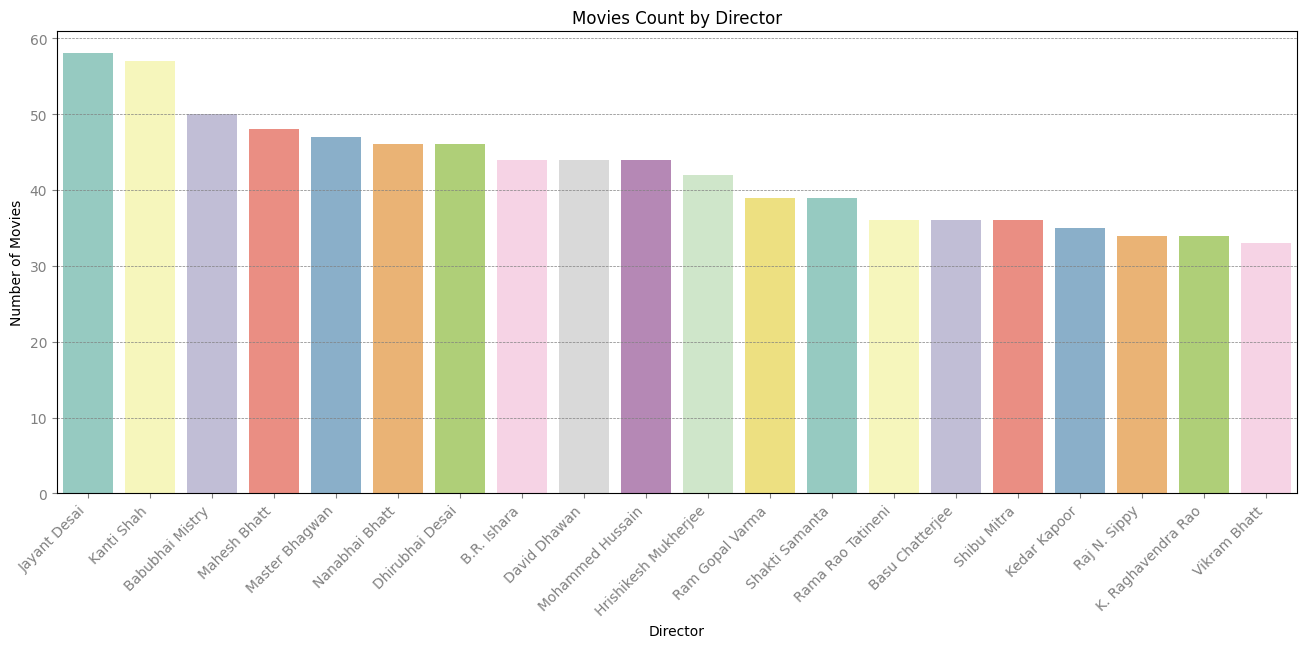

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a vertical count plot for all directors
plt.figure(figsize=(16, 6))
sns.countplot(x='Director', data=df, order=df['Director'].value_counts().index[:20], palette='Set3')

plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Movies Count by Director')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Reduce the prominence of black by setting grid lines and ticks to a lighter color
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')

plt.show()

iii. Adding a Regression Line with Seaborn

You can add a regression line to the scatter plot to see the general trend between the duration and rating.

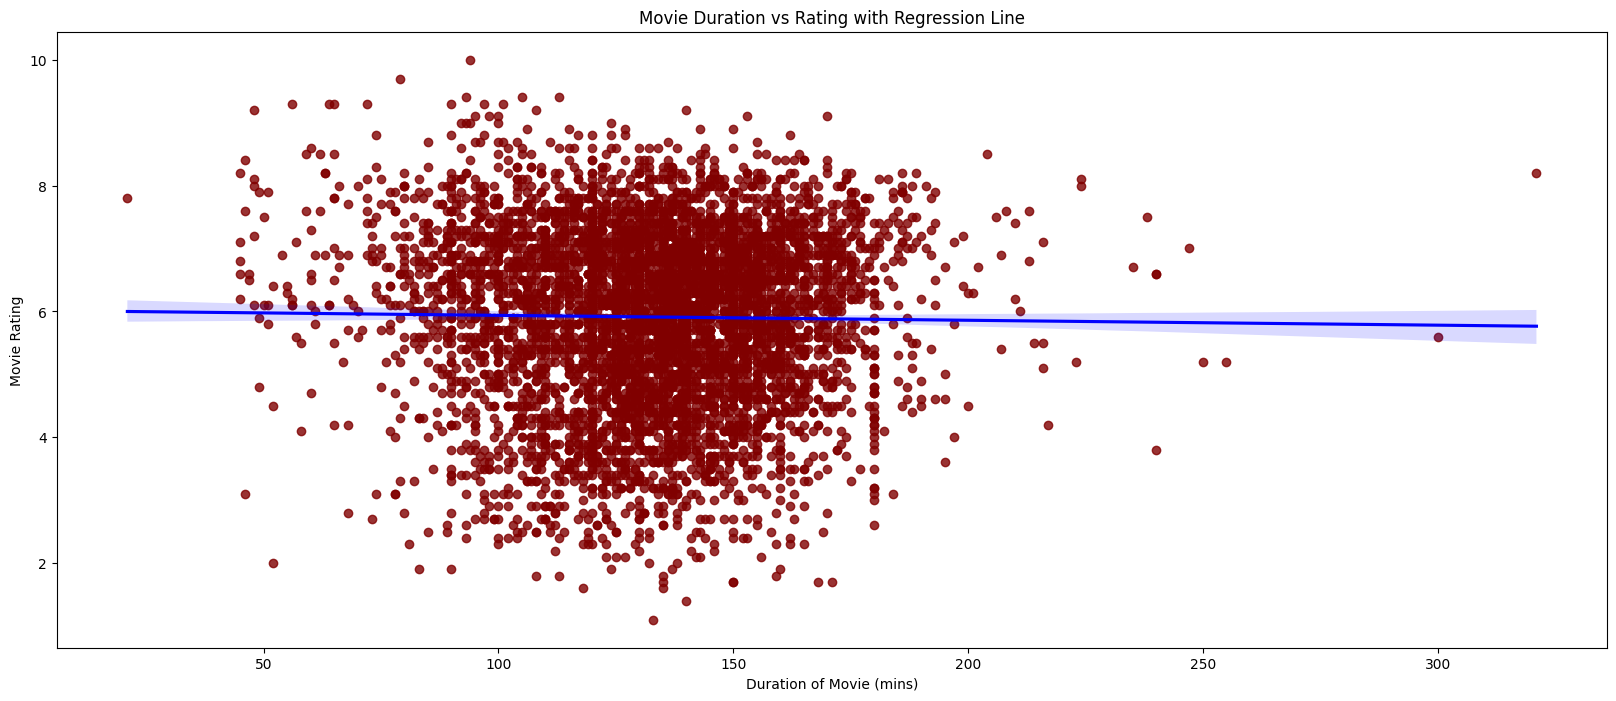

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
# Create a scatter plot with a regression line
sns.regplot(x=df['Duration'], y=df['Rating'], scatter_kws={'color': 'maroon'}, line_kws={'color': 'blue'})
plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating with Regression Line')
plt.show()

iii. Distribution Plot of Ratings

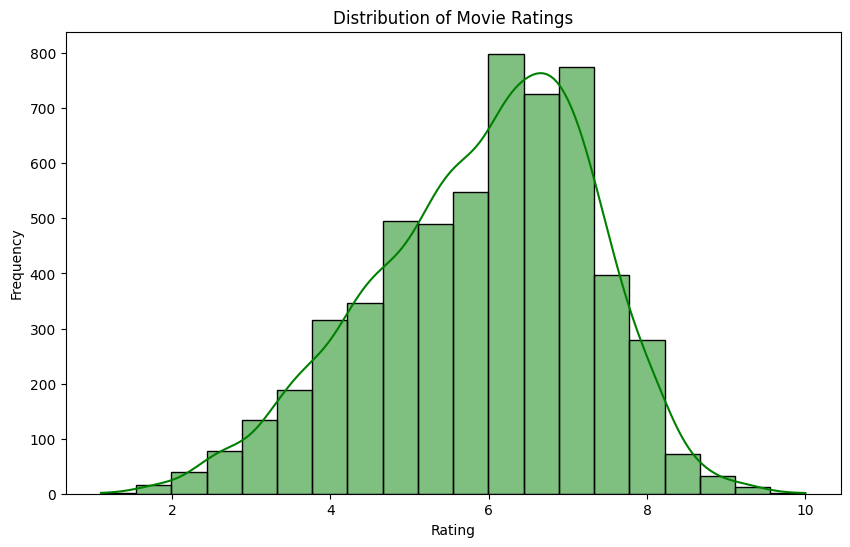

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='green')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

# Feature Engineering

In [ ]:
# Check existing columns
print(df.columns)

# Drop columns that might not exist using errors='ignore'
df.drop(['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True, errors='ignore')

# Show first five records of the dataframe
df.head()

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Genre1', 'Genre2', 'Genre3'],
      dtype='object')


,Year,Duration,Genre,Rating,Votes,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Drama,0,0
3,2019,110,"Comedy, Romance",4.4,35,Comedy,Romance,0
5,1997,147,"Comedy, Drama, Musical",4.7,827,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,1086,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Horror,Mystery,Thriller


In [ ]:
from sklearn.model_selection import train_test_split

# Create target variable and feature observations
X = df[['Year', 'Duration', 'Votes']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)

# Predictive Modeling Approaches

i. Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
pred = lr.predict(X_test)
print(f'R^2 Score: {r2_score(y_test, pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, pred)}')

R^2 Score: -0.01563726323908554
Mean Absolute Error: 1.0733816659990552
Mean Squared Error: 1.9682447230144082


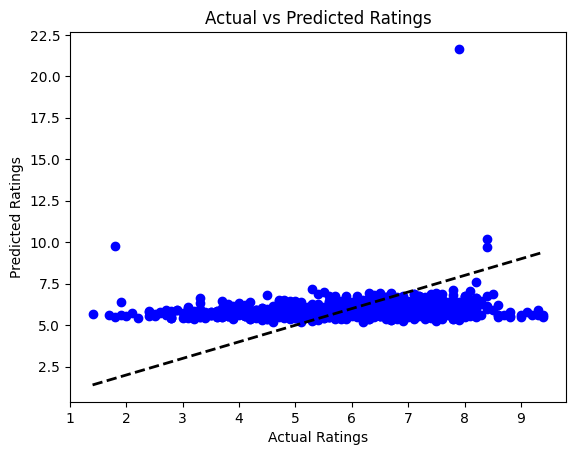

In [ ]:
# Visualization of Predictions
import matplotlib.pyplot as plt

# Predict and plot
pred = lr.predict(X_test)
plt.scatter(y_test, pred, color='blue')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

ii. Random Forest Regressor

An ensemble method that combines multiple decision trees to improve prediction accuracy and control overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train the Random Forest Regressor model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=231)
forest_reg.fit(X_train, y_train)

# Predict and evaluate
forest_pred = forest_reg.predict(X_test)
print(f'Random Forest Regressor R^2 Score: {r2_score(y_test, forest_pred)}')

Random Forest Regressor R^2 Score: 0.23100549076639243


iii. K-Nearest Neighbors Regressor

 A model that predicts the target variable based on the average of the target values of the nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Create and train the K-Nearest Neighbors Regressor model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict and evaluate
knn_pred = knn_reg.predict(X_test)
print(f'K-Nearest Neighbors Regressor R^2 Score: {r2_score(y_test, knn_pred)}')

K-Nearest Neighbors Regressor R^2 Score: 0.14348774006389853


# Summary

In summary, this project enabled us to delve into diverse techniques for data analysis, preprocessing, feature engineering, and machine learning modeling. We gained valuable insights into the factors affecting movie ratings and developed a model to predict ratings accurately.